# Домашнее задание №5. Многоклассовая классификация. PCA

## Ф.И.О: Винарский Александр Анатольевич

По вопросам в задании писать в беседу курса или в лс (tg: @Skorik_S)

Домашнее задание состоит из 2-х частей:

* Теоретическая часть
* Практическая часть

На проверку требуется отправить zip архив, который будет содержать следующие файлы:

* заполненный блокнот (теоретическая часть + эксперименты) в формате .ipynb
* заполненный блокнот в формате .html (File -> Save and Export Notebook As -> HTML -> ...)

Убедитесь, что все ячейки запускаются без ошибок (`Runtime` --> `Run all`)

Для того чтобы получить полный балл за ноутбук, можно не решать задачи со звёздочкой, но их выполнение даст дополнительные баллы.

# Теоретическая часть

## 1. Метрики классификации

## Задание 1 (1.5 балла)

Рассмотрим следующую выборку

In [ ]:
import pandas as pd

data = {
    "Instance": range(1, 16),
    "Probability_Output": [0.95, 0.85, 0.75, 0.65, 0.60, 0.55, 0.50, 0.45, 0.40,
                           0.35, 0.30, 0.25, 0.20, 0.15, 0.10],
    "Target": [1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]
}

df = pd.DataFrame(data)

df

,Instance,Probability_Output,Target
0,1,0.95,1
1,2,0.85,1
2,3,0.75,1
3,4,0.65,1
4,5,0.60,0
5,6,0.55,0
6,7,0.50,1
7,8,0.45,0
8,9,0.40,0
9,10,0.35,1


Выборка содержит номер сэмпла `Instance`, ответ модели $a(x)$ (в терминах вероятности принадлежности положительному классу `Probability_Output`) и реальную метку `Target`.

Качество модели $a(x)$ определяется выбираемым порогом $t \in [0, 1]$. Получая конкретные значения ответов $o(x, t) = \mathbb{I}[a(x) \geqslant t]$, где $\mathbb{I}[\cdot]$ - индикаторная функция, мы можем посчитать точность, f1-score и другие метрики классификации.  

1. Постройте ROC и PR кривые. Посчитайте площади под графиками.
2.   Какой из графиков лучше описывает предсказания модели? Ответ обоснуйте.
3.   Пусть теперь ответы модели $a(x, t)$ определяются выражением: $a(x, t) := \mathbb{I}[a(x) \geqslant t]$. Дайте аналитические выражения площади под ROC- и PR-кривой, используя долю правильных ответов и полноту $a(x, t)$, а также количество отрицательных и положительных примеров $\ell_-$, $\ell_+$.
4.   Каким, на ваш взгляд, должен быть оптимальный порог в случае, если положительная метка означает:
        * Наличие болезни у человека.
        * Решение о выделении большого кредита.

**Важно!** Задание проверяет базовое умение строить ROC и PR графики, поэтому использование готовых решений типа `sklearn.metrics.roc_curve` запрещено. Все вспомогательные шаги для отрисовки графиков должны быть имплементированы самостоятельно (либо построение графика может быть выполнено аналитически). Пункты 2-4 должны быть выполнены аналитически. Все ответы должны быть обоснованы.

---

#### Ваше решение:

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
probs= np.array([0.95, 0.85, 0.75, 0.65, 0.60, 0.55, 0.50, 0.45, 0.40,
                  0.35, 0.30, 0.25, 0.20, 0.15, 0.10], dtype=float)
y_true= np.array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int)
thresholds= np.r_[np.inf, np.unique(probs)[::-1], -np.inf]

P= int(y_true.sum())
N= int(len(y_true)-P)
roc_points= []
pr_points= []
rows= []

for t in thresholds:
    y_pred= (probs>= t).astype(int)

    TP= int(((y_pred == 1) & (y_true == 1)).sum())
    FP= int(((y_pred == 1) & (y_true == 0)).sum())
    FN= int(((y_pred == 0) & (y_true == 1)).sum())
    TN= int(((y_pred == 0) & (y_true == 0)).sum())

    TPR= TP/P if P else 0
    FPR= FP/N if N else 0
    precision= TP/(TP+FP) if (TP+FP) else 1
    recall= TPR
    f1= 2 *precision*recall/(precision+recall) if (precision+recall) else 0
    roc_points.append((FPR, TPR))
    pr_points.append((recall, precision))
    if np.isfinite(t):
        rows.append((float(t), TP, FP, FN, TN, precision, recall, f1))


roc= np.array(roc_points)
roc= roc[np.argsort(roc[:, 0])]

pr= np.array(pr_points)
pr= pr[np.argsort(pr[:, 0])]

def auc_trap(xy: np.ndarray) -> float:
    x, y= xy[:,0], xy[:,1]
    return float(np.trapz(y,x))

auc_roc= auc_trap(roc)
auc_pr= auc_trap(pr)
print("ROC-AUC:", auc_roc)
print("PR-AUC:", auc_pr)


ROC-AUC: 0.8035714285714286
PR-AUC: 0.8332354153782724


/tmp/ipython-input-647287483.py:39: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return float(np.trapz(y,x))


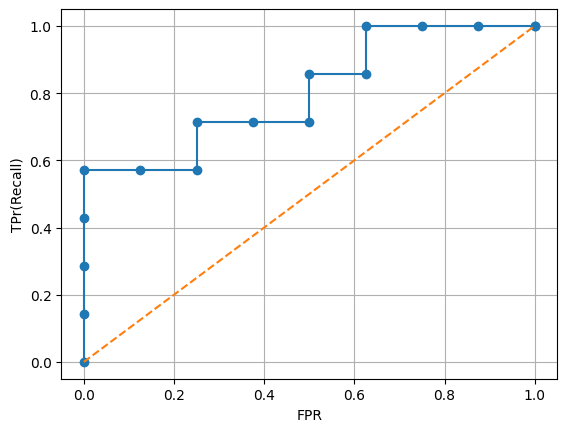

In [ ]:
plt.plot(roc[:,0], roc[:,1], marker='o')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPr(Recall)')
plt.grid()

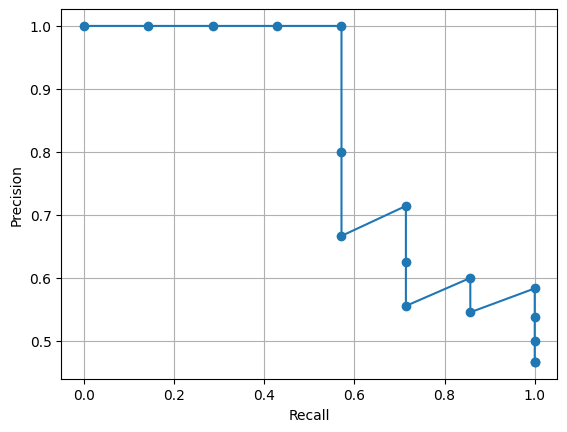

In [ ]:
plt.plot(pr[:,0], pr[:,1], marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame(rows, columns=['threshold','TP','FP','FN','TN','precision','recall','F1'])
display(df.sort_values('threshold', ascending=False).reset_index(drop=True))

,threshold,TP,FP,FN,TN,precision,recall,F1
0,0.95,1,0,6,8,1.000000,0.142857,0.250000
1,0.85,2,0,5,8,1.000000,0.285714,0.444444
2,0.75,3,0,4,8,1.000000,0.428571,0.600000
3,0.65,4,0,3,8,1.000000,0.571429,0.727273
4,0.60,4,1,3,7,0.800000,0.571429,0.666667
5,0.55,4,2,3,6,0.666667,0.571429,0.615385
6,0.50,5,2,2,6,0.714286,0.714286,0.714286
7,0.45,5,3,2,5,0.625000,0.714286,0.666667
8,0.40,5,4,2,4,0.555556,0.714286,0.625000
9,0.35,6,4,1,4,0.600000,0.857143,0.705882


**Ответ:**

ROC-AUC ≈ 0.804
PR-AUC ≈ 0.833
<br>

* Какой график лучше

precision-recall (то есть PR кривая) для работы по положительному классу и/или если классы несбалансированы <br>
При сбалансированных классах и при общем определении - ROC. Здесь классы почти сбалансированы <br>



* Про пороги: <br>
Болезнь => позитив => минимум FN => высокий recall => t ~= 0.25 (Recall=1, F1 макс.) <br>
Выдать кредит => Позитив => минимум FP => высокий precision => FP=0 => t ~= 0.65 (Precision=1, Recall=0.571)

Порог $t$:  $\hat y_i(t)=1[a(x_i) >= t]$ <br>
Обозначения:  $l_+=$ {y=1},  $l_-=$ {y=0} <br>
${TP}(t)=\sum_i 1[y_i=1]1[a(x_i) >= t]$,  ${FP}(t)=\sum_i 1[y_i=0]1[a(x_i)\ge t]$ <br>
${FN}(t)=l_+ - {TP}(t)$,  ${TN}(t)= l_- - {FP}(t)$ <br>
${TPR}(t)={TP}(t)/ l_+$,  ${FPR}(t)={FP}(t)/ l_-$,  ${Prec.}(t)={TP}(t)/({TP}(t)+{FP}(t))$ <br>

Площади: <br>
$\mathrm{AUC}_{{ROC}}=\sum_i \dfrac{{TPR}_i+{TPR}_{i-1}}{2}\,({FPR}_i-{FPR}_{i-1})$ <br>
${AUC}_{{PR}}=\sum_i \frac{{Prec}_i+{Prec}_{i-1}}{2}\,({Recall}_i-{Recall}_{i-1})$ <br>
${AUC}_{{PR}}=\sum_i {Prec}_i\,\Delta{Recall}_i$ <br>

(${AUC}_{{ROC}}=\frac{1}{l_+\,l_-}\sum_{y_i=1}\sum_{y_j=0}(1(a_i>a_j)+\tfrac12\,1(a_i=a_j))$) <br>


## Задание 2 (1 балл)

1. Покажите, что:
$$
0 \leqslant \text{F1-score} \leqslant 1
$$
2. Покажите, что в случае многоклассовой классификации $Precision_{micro} = Recall_{micro} = Accuracy$

---

#### Ваше решение:

---

1) Пусть $p=\text{Precision}\in[0,1]$ и $r=\text{Recall}\in[0,1]$ Тогда $F1=\frac{2pr}{p+r}$ <br>
Неотрицательность: $p,r\ge0 => 2pr\ge0$ и $p+r\ge0 => F1\ge0$ <br>
Верхняя граница: гармоническое среднее $\le$ арифметического: $F1=\frac{2}{\tfrac1p+\tfrac1r} \le \frac{p+r}{2} \le 1$, так как $p\le1$, $r\le1 => (p+r)/2\le1$ <br>
Точки равенства: $F1=0$ тогда и только тогда, когда $p=0$ или $r=0$  $F1=1$ тогда и только тогда, когда $p=r=1$ <br>
$0\le F1\le1$ ЧТД <br>

2) Пусть классов $K$, всего объектов $n$ <br>
$k$: $\text{TP}_k,\text{FP}_k,\text{FN}_k$ <br>
$\text{Prec}_{\text{micro}}=\frac{\sum_k \text{TP}_k}{\sum_k(\text{TP}_k+\text{FP}_k)}$ <br>
$\text{Rec}_{\text{micro}}=\frac{\sum_k \text{TP}_k}{\sum_k(\text{TP}_k+\text{FN}_k)}$ <br>
Single-label => каждый объект- ровно один истинный и ровно один предсказанный класс <br>
$\sum_k ({TP}_k+ {FP}_k)=n$ <br>
$\sum_k ({TP}_k+ {FN}_k)=n$ <br>
$\sum_k {TP}_k=n_{{correct}}$ <br>
${Prec}_{\text{micro}}=\frac{\sum_k \text{TP}_k}{n}=\text{Accuracy}$ <br>
${Rec}_{\text{micro}}=\frac{\sum_k \text{TP}_k}{n}=\text{Accuracy}$ <br>


# Практическая часть

In [ ]:
from typing import Callable
import os
import pandas as pd
import numpy as np
import gdown
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
def download_with_shared_id(file_id, filename):
    url = f"https://drive.google.com/uc?export=download&id={file_id}"
    gdown.download(url, filename, quiet=False)

## Задание 8 (8.5 баллов)
#### PCA on sythetic data

В папке с заданием вы найдёте файл `synthetic_data.csv`. Вы можете напрямую загрузить файл во временной окружение или воспользоваться кодом ниже

In [ ]:
synthetic_data_file_id = '1mB6bUInPMxUmvLf58SA33Jd1ZQOe1OWc'
download_with_shared_id(synthetic_data_file_id, 'synthetic_data.csv')
df = pd.read_csv('synthetic_data.csv')
df.head(5)

Downloading...
From: https://drive.google.com/uc?export=download&id=1mB6bUInPMxUmvLf58SA33Jd1ZQOe1OWc
To: /content/synthetic_data.csv
100%|██████████| 253k/253k [00:00<00:00, 35.2MB/s]


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,label
0,0.373742,2.082607,1.384016,0.232210,1.867932,0.799906,1.569763,1.743720,2.718933,3.638285,0.581565,1.133964,-0.613302,0
1,-1.651953,2.433542,0.968096,0.000237,1.823808,0.298767,0.968167,0.975870,2.448763,1.862862,0.113761,1.138231,-1.089608,0
2,-0.940813,3.277671,1.587022,0.000137,1.999868,0.421152,1.587080,1.371682,3.291364,3.861090,-0.097646,1.689374,-0.887808,0
3,-0.532969,2.683229,2.297609,0.005673,1.747180,0.594575,2.300983,1.788795,2.783969,3.345638,0.186806,1.312156,-0.544618,0
4,-1.067956,2.409374,0.915896,0.002368,1.793093,0.441066,0.916941,1.091797,2.460215,1.920850,0.151944,1.277589,-0.769468,0


### Задача 1 (0.5 балла)
#### Анализ данных

1. Проведите базовый исследовательский анализ предложенных данных.
    *   Исследуйте распределение меток
    *   Визуализируйте зависимости между компонентами примеров

    (Анализ данных не обязан ограничиваться данными пунктами)
2. Выберите метрики для дальнейшего тестирования
3. Для того, чтобы тестирование вашей имплементации PCA было корректным, **важно** не изменять структуру и содержимое `df`.

In [ ]:
from pandas.plotting import scatter_matrix

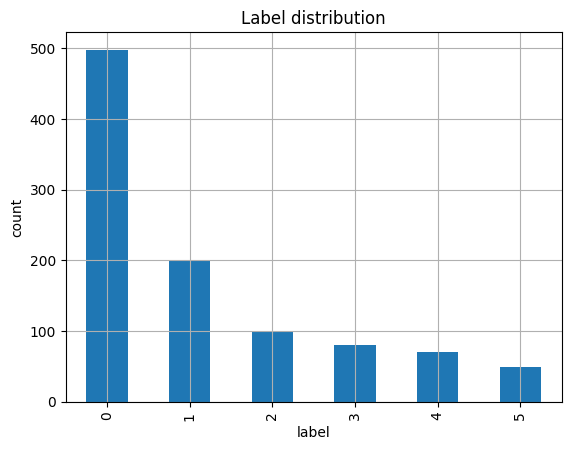

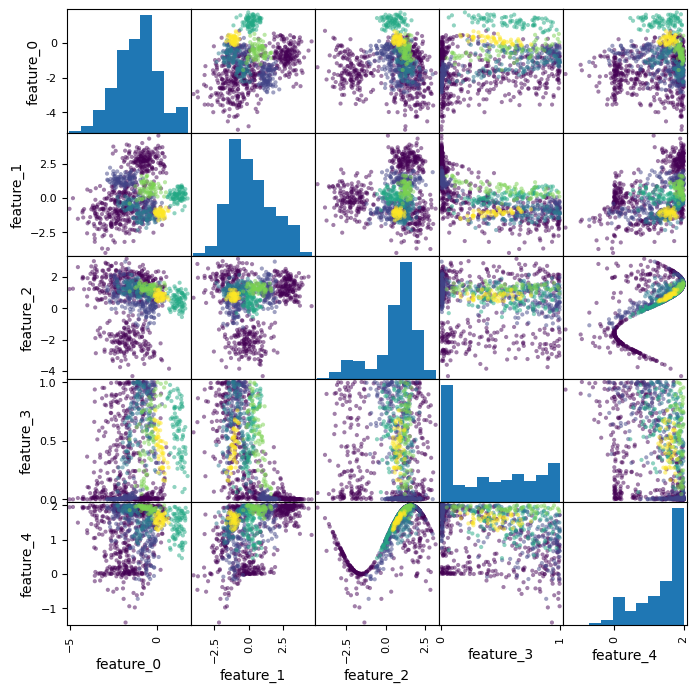

In [ ]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

df['label'].value_counts().sort_index().plot(kind='bar', grid=True, title='Label distribution')
plt.xlabel('label'); plt.ylabel('count'); plt.show()


cols= df.drop(columns='label').columns[:5]
axes= scatter_matrix(df[cols], figsize=(8,8), diagonal='hist', alpha=0.5, c=df['label'])
plt.show()

В случае данных, природа которых нам не ясна, имеет смысл проводить *стандартизацию.* Стандартизация проводится на основе статистик датасета (среднее, дисперсия). Хорошим тоном является подсчёт таких статистик только для тренировочной части выборки. В этом случае мы исключаем неявное "подсматривание" в тестовый набор, получая более объективные результаты предсказаний.

Делать мы так, конечно же, не будем 😃🤗😃 (чтобы не усложнять себе жизнь при понижении размерности с помощью PCA).

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X= df.drop(columns='label')
y= df['label']

Проведите стандартизацию (для этого воспользуйтесь модулем `sklearn.preprocessing.StandardScaler`)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
# Output: X

scaler= StandardScaler()
X= scaler.fit_transform(X.values if hasattr(X, "values") else X)

### Задача 2 (1 балл)
#### Имплементация PCA

Самостоятельно имплементируйте метод главных компонент согласно утверждению из Задания 4.3.

1.   Постройте матрицу $X^\top X$. Вы можете воспользоваться тем что
$$
cov(X, X) = \dfrac{1}{n-1}\overline{X}^\top\overline{X}, \quad \overline{X} = X - mean(X).
$$
2. Найдите собственные значения и собственные векторы матрицы $X^\top X$
3. Отсортируйте с.з. и с.в. в убывающем порядке.

**Примечание:** Для выполнения пунктов 1-2 вы можете пользоваться соответствующим функционалом библиотеки `numpy`.

In [ ]:
Xc= X-X.mean(axis=0)
n= Xc.shape[0]
cov_matrix= (Xc.T@Xc)/(n-1)

In [ ]:
def get_pca_components(cov_matrix):
    # make points 2. and 3.
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################

    eigenvalues, eigenvectors= np.linalg.eigh(cov_matrix)
    idx= np.argsort(eigenvalues)[::-1]
    eigenvalues= eigenvalues[idx]
    eigenvectors= eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# 1. compute covariance matrix to `cov_matrix`
eigenvalues, eigenvectors = get_pca_components(cov_matrix)

In [ ]:
def assert_eigenvalues(eigenvalues: np.ndarray) -> None:
    true_eigenvalues = np.array([3.71065006e+00, 2.83985667e+00, 2.00690398e+00, 1.06056661e+00,
                                 1.04028115e+00, 8.96689475e-01, 6.42816087e-01, 4.42744367e-01,
                                 2.94271935e-01, 5.91739353e-02, 1.65303064e-02, 1.55655953e-03,
                                 9.97985951e-04]
                              )
    assert np.allclose(true_eigenvalues, eigenvalues, atol=1e-6), "Eigenvalues are not equivalent"
    print("Success!!!")

assert_eigenvalues(eigenvalues)

Success!!!


Построим график суммарной объясняемой дисперсии (Cumulative Explained Variance) от количества главных компонент.

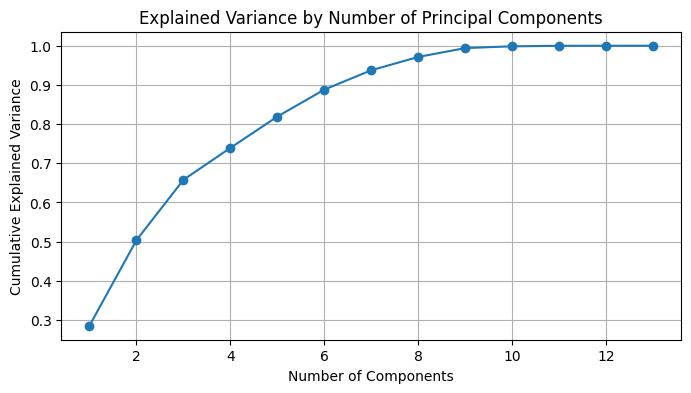

In [ ]:
# Calculate explained variance for each component
explained_variance_ratio = eigenvalues / eigenvalues.sum()

# Plot explained variance
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

Одной из особенностей предложенного набора данных является дисбаланс классов (мы надеемся, что вы это выяснили в ходе анализа данных). Таким образом, корректное разделение выборки на обучение и тест должно быть [стратифицированным](https://scikit-learn.org/stable/modules/cross_validation.html#stratification).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Задача 3 (2 балла)
#### Классификация

Проведите обучение и тестирование логистической регрессии. Данные должны проецироваться на полученные главные компоненты (см. (1) в задании 4.1). Постройте графики зависимости выбранных метрик от количества главных компонент. Сделайте выводы.

In [ ]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

Xtr_mean= X_train.mean(axis=0)
Xtr_c= X_train-Xtr_mean
n_tr= Xtr_c.shape[0]
cov_tr= (Xtr_c.T@Xtr_c)/(n_tr-1)
vals, vecs= np.linalg.eigh(cov_tr)
idx= np.argsort(vals)[::-1]
vals= vals[idx]
vecs= vecs[:, idx]
p= X_train.shape[1]
ks= np.arange(1, p + 1)
accs,f1s,aucs= [], [], []

for k in ks:
    Wk = vecs[:,:k]
    Ztr= (X_train- Xtr_mean)@Wk
    Zte= (X_test-Xtr_mean)@Wk

    clf= LogisticRegression(max_iter=2000, solver='liblinear')
    clf.fit(Ztr, y_train)
    y_pred= clf.predict(Zte)
    y_prob= clf.predict_proba(Zte)[:, 1] if len(np.unique(y_train)) == 2 else None
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average='binary' if len(np.unique(y_test))==2 else 'macro'))
    aucs.append(roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan)


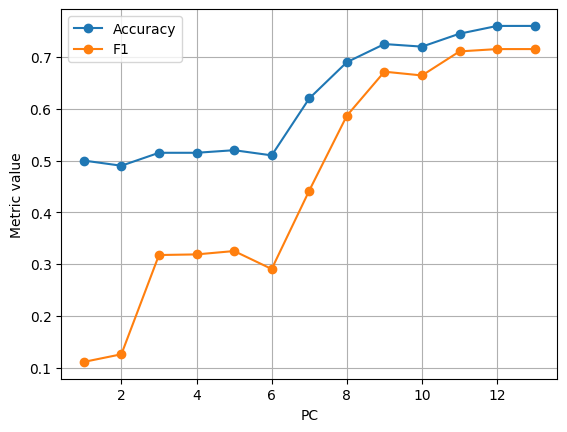

In [ ]:
plt.plot(ks, accs, marker='o', label='Accuracy')
plt.plot(ks, f1s, marker='o', label='F1')
if not np.isnan(aucs).all():
    plt.plot(ks, aucs, marker='o', label='ROC-AUC')
plt.xlabel('PC')
plt.ylabel('Metric value')
plt.grid()
plt.legend()

### Задача 4 (5 баллов)
#### Имплементация Kernel-PCA

Приступим к имплементации Kernel-PCA😋.

Цель та же - найти с.з. и с.в. Однако вместо поиска их у матрицы ковариации $cov(X, X)$ будем искать их для матрицы Грама (см. задание 4.4).

Будем рассматривать следующие типы ядерных функций:

* Линейное $K_{L}(X,Y) =  X Y^\top$
* Полиномиальное $K_{d, c}(X,Y) = (X Y^\top + c)^d$
* Радиально-Базисная Функция (РБФ) $K_\gamma(X, Y) = \exp\left\{\gamma\|X-Y\|^2\right\}$
* Сигмоидальная $\sigma_{\gamma}(X, Y) = \tanh{(\gamma\cdot X Y^\top + c)}$
* Косинусная $cos(X, Y) = X Y^\top / (\|X\|*\|Y\|)$

#### Задача 4.1 (1 балл)
Необходимо имплементировать перечисленные ядерные функции

In [ ]:
def linear_kernel(X, Y=None):
    if Y is None:
        Y = X
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    X= np.asarray(X, dtype=float)
    Y= X if Y is None else np.asarray(Y, dtype=float)
    kernel= X@Y.T

    assert kernel.shape == (X.shape[0], X.shape[0])
    return kernel

def poly_kernel(X, Y=None, degree=3, coef=1.):
    if Y is None:
        Y = X
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    X= np.asarray(X, dtype=float)
    Y= X if Y is None else np.asarray(Y, dtype=float)
    kernel= (X@Y.T+coef)**degree

    assert kernel.shape == (X.shape[0], X.shape[0])
    return kernel

def rbf_kernel(X, Y=None, gamma=None):
    if Y is None:
        Y = X
    if gamma is None:
        gamma = 1.0 / X.shape[1]
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    X= np.asarray(X, dtype=float)
    Y= X if Y is None else np.asarray(Y, dtype=float)
    XX= np.sum(X**2,axis=1,keepdims=True)
    YY= np.sum(Y**2,axis=1,keepdims=True).T
    d2= XX + YY - 2.0 * (X @ Y.T)
    kernel= np.exp(-gamma*d2)


    assert kernel.shape == (X.shape[0], X.shape[0])
    return kernel

def sigmoid_kernel(X, Y=None, gamma=None, coef=1.):
    if Y is None:
        Y = X
    if gamma is None:
        gamma = 1.0 / X.shape[1]
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    X= np.asarray(X, dtype=float)
    Y= X if Y is None else np.asarray(Y, dtype=float)
    kernel= np.tanh(gamma*(X@Y.T)+coef)



    assert kernel.shape == (X.shape[0], X.shape[0])
    return kernel

def cosine_kernel(X, Y=None, gamma=None, coef=1.):
    if Y is None:
        Y = X
    if gamma is None:
        gamma = 1.0 / X.shape[1]
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################

    X= np.asarray(X, dtype=float)
    Y= X if Y is None else np.asarray(Y, dtype=float)
    Xn= X/(np.linalg.norm(X,axis=1,keepdims=True)+1e-12)
    Yn= Y/(np.linalg.norm(Y,axis=1,keepdims=True)+1e-12)
    kernel= Xn@Yn.T


    assert kernel.shape == (X.shape[0], X.shape[0])
    return kernel

Полученную матрицу необходимо центрировать. Воспользуемся результатом задания 4.4:
$$
\bar{K} = K - \mathbf{1_n} \cdot K - K \cdot \mathbf{1_n} + \mathbf{1_n} \cdot K \cdot \mathbf{1_n}, \quad K = \|\mathcal{K}(x_i, x_j)\|_{i, j}^n,\,\,\, \mathbf{1_n} \equiv \|1 / n\|_{i, j}^n.
$$

#### Задача 4.2 (0.5 балла)
Имплементируйте центрирование матрицы Грама

In [ ]:
def center_kernel(K):
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    n= K.shape[0]
    J= np.ones((n, n), dtype=K.dtype)/n
    Kc= K- J@K- K@J+ J@K@J
    return Kc

Соберём все в класс `KernelPCA`

In [ ]:
class KernelPCA:
    def __init__(self, n_components: int, kernel: Callable, **kernel_params) -> None:
        self.n_components = n_components
        assert isinstance(kernel, Callable), f"kernel should be Callable, you provide {type(kernel)}"
        self.kernel = kernel
        self.kernel_params = kernel_params
        self.eigenvalues = None
        self.eigenvectors = None

    def fit_transform(self, X):
        K = self.kernel(X, **self.kernel_params)
        K_centered = center_kernel(K)
        self.eigenvalues, self.eigenvectors = get_pca_components(K_centered)
        self.eigenvalues = np.clip(self.eigenvalues, a_min=0, a_max=None)
        # Normalize eigenvectors (each column divided by sqrt(eigenvalue))
        self.eigenvectors = self.eigenvectors / np.sqrt(self.eigenvalues + 1e-10)
        self.eigenvalues = self.eigenvalues[:self.n_components]
        return np.dot(K_centered, self.eigenvectors[:, :self.n_components])

Проверка имплементации

In [ ]:
def assert_kpca():
    n_components = 13

    linear_answers = np.array([
        1.00000000e+00, 7.65325918e-01, 5.40849701e-01, 2.85816930e-01,
        2.80350109e-01, 2.41652934e-01, 1.73235437e-01, 1.19317198e-01,
        7.93046851e-02, 1.59470536e-02, 4.45482761e-03, 4.19484323e-04,
        2.68951783e-04
    ])

    poly_answers = np.array([
        1.00000000e+00, 8.38128700e-01, 5.16131520e-01, 3.77038000e-01,
        3.08713630e-01, 2.78047060e-01, 2.57149900e-01, 2.43782890e-01,
        2.24221330e-01, 2.07156400e-01, 1.82629920e-01, 1.66992480e-01,
        1.57221440e-01
    ])

    rbf_answers = np.array([
        1.00000000e+00, 7.15032620e-01, 6.79436430e-01, 3.15607890e-01,
        3.05523880e-01, 2.87117720e-01, 2.84299700e-01, 2.72074470e-01,
        2.42323240e-01, 1.87167890e-01, 1.48309100e-01, 1.37459850e-01,
        1.28174180e-01
    ])

    sigmoid_answers = np.array([
        1.00000000e+00, 7.61327120e-01, 4.70978290e-01, 3.01313000e-01,
        2.95793220e-01, 2.54351330e-01, 1.15666760e-01, 9.23709900e-02,
        4.52054200e-02, 1.68690600e-02, 1.42803400e-02, 1.14450900e-02,
        1.03591100e-02
    ])

    cosine_answers = np.array([
        1.00000000e+00, 7.13192056e-01, 5.48668783e-01, 2.99406183e-01,
        2.88770492e-01, 2.72318496e-01, 1.81658909e-01, 1.31574265e-01,
        7.24384288e-02, 1.31406641e-02, 4.31671372e-03, 4.67396214e-04,
        2.88007519e-04
    ])

    true_eigenvalues = {
        'linear': linear_answers,
        'poly': poly_answers,
        'rbf': rbf_answers,
        'sigmoid': sigmoid_answers,
        'cosine': cosine_answers
    }

    kernels = [linear_kernel, poly_kernel, rbf_kernel, sigmoid_kernel, cosine_kernel]

    for kernel in kernels:
        kpca = KernelPCA(n_components=n_components, kernel=kernel)
        _ = kpca.fit_transform(X)
        target_eigenvalues = kpca.eigenvalues / kpca.eigenvalues[0]
        kernel_name = kernel.__name__.replace('_kernel', '')

        assert np.allclose(
            true_eigenvalues[kernel_name],
            target_eigenvalues,
            atol=1e-6
        ), f"{kernel.__name__} eigenvalues are not equivalent"

    print("Success!")

assert_kpca()

Success!


#### Задача 4.3 (2 балла)
Проведите обучение и тестирование логистической регрессии. Данные должны проецироваться на главные компоненты `KernelPCA` для различных типов ядерных функций.

*Обратите внимание!* Главные компоненты получаются для всей матрицы $X$. Таким образом вначале необходимо осуществить проецирование, а затем деление набора на `train` и `test`

*Обратите внимание [2]!* В `KernelPCA` передаётся `Callable` объект `kernel`. Таким образом, инициализация не ограничивается имплементированными ядерными функциями, но и может содержать композитные ядра, как это проводилось на семинаре.

Вам необходимо сравнить качество имплементированных ядерных функций от количества главных компонент. Добавьте по-крайней мере одну композитную ядерную функцию. Сравните результаты с линейным ядром. Сделайте выводы.

**Важно!** Используйте команду `%%time` для подсчета выполнения полной процедуры обучения. Это потребуется для сравнения с имплементацией `sklearn` в следующем пункте.

In [ ]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

X_np = X.values if hasattr(X, "values") else X
y_np = y.values if hasattr(y, "values") else y


In [ ]:
%%time

kernels = {
    "linear": linear_kernel,
    "rbf": (lambda A, B=None: rbf_kernel(A, B, gamma=1.0 / A.shape[1])),
    "poly3": (lambda A, B=None: poly_kernel(A, B, degree=3, coef=1.0)),
    "sigmoid": (lambda A, B=None: sigmoid_kernel(A, B, gamma=1.0 / A.shape[1], coef=1.0)),
    "cosine": cosine_kernel,
    "rbf+poly":(lambda A, B=None: 0.5*rbf_kernel(A,B, gamma=1.0 / A.shape[1]) + 0.5*poly_kernel(A,B, degree=3, coef=1.0)),
}

n_components_max= min(13, X_np.shape[1])
ks= np.arange(1, n_components_max + 1)
results= {name: {"acc": [], "f1": [], "auc": []} for name in kernels}

for name, ker in kernels.items():
    kpca= KernelPCA(n_components=n_components_max, kernel=ker)
    Z_full= kpca.fit_transform(X_np)

    Z_train, Z_test, y_train, y_test= train_test_split(Z_full, y_np, test_size=0.2, random_state=42, stratify=y_np)

    for k in ks:
        Ztr_k= Z_train[:, :k]
        Zte_k= Z_test[:, :k]

        clf= LogisticRegression(max_iter=2000, solver="liblinear")
        clf.fit(Ztr_k, y_train)

        y_pred= clf.predict(Zte_k)
        try:
            y_prob= clf.predict_proba(Zte_k)[:, 1]
            auc= roc_auc_score(y_test, y_prob)
        except Exception:
            auc= np.nan

        acc= accuracy_score(y_test, y_pred)
        f1= f1_score(y_test, y_pred, average="binary" if len(np.unique(y_np))==2 else "macro")

        results[name]["acc"].append(acc)
        results[name]["f1"].append(f1)
        results[name]["auc"].append(auc)



CPU times: user 14.1 s, sys: 171 ms, total: 14.3 s
Wall time: 17.2 s


In [ ]:
def plot_metric(metric, ylabel):
    plt.figure(figsize=(8,5))
    for name in kernels:
        plt.plot(ks, results[name][metric], marker='o', label=name)
    plt.xlabel('KPCA кмпоненты (k)')
    plt.ylabel(ylabel)
    plt.grid()
    plt.legend()

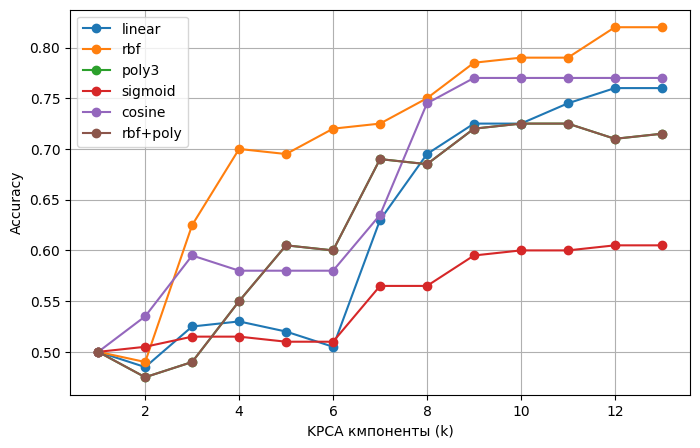

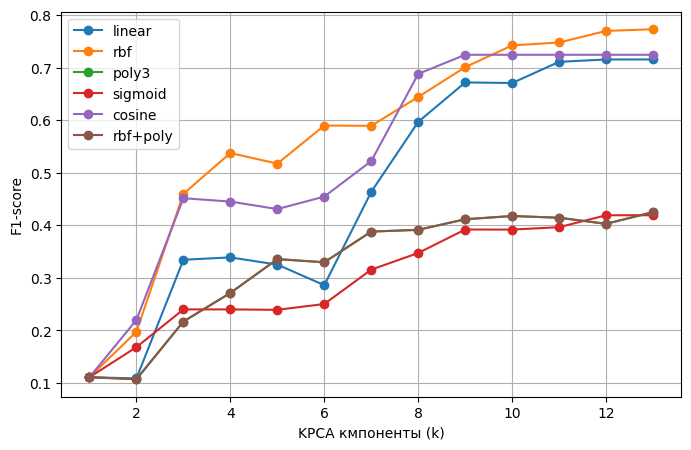

In [ ]:
plot_metric("acc", "Accuracy")
plot_metric("f1",  "F1-score")
if len(np.unique(y_np)) == 2:
    plot_metric("auc", "ROC-AUC")

#### Задача 4 (1.5 балла)
Проведите аналогичное обучение для библиотечной имплементации `from sklearn.decomposition import KernelPCA as SKKernelPCA`. Пользуйтесь аналогичной логикой `fit_transform` на всём обучающем наборе, а затем стратифицированно делите.

Сравните время и качество классификации. Есть ли различие? Сделайте выводы.

In [ ]:
from sklearn.decomposition import KernelPCA as SKKernelPCA

In [ ]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
X_np = X if isinstance(X, np.ndarray) else X.values
y_np = y if isinstance(y, np.ndarray) else y.values

kernels = {
    "linear": dict(kernel="linear"),
    "rbf": dict(kernel="rbf",    gamma=1.0 / X_np.shape[1]),
    "poly3": dict(kernel="poly",   degree=3, coef0=1.0),
    "sigmoid": dict(kernel="sigmoid",gamma=1.0 / X_np.shape[1], coef0=1.0),
    "cosine": dict(kernel="cosine")}

n_components_max= min(13, X_np.shape[1])
ks= np.arange(1, n_components_max + 1)
results_skl= {name: {"acc": [], "f1": [], "auc": []} for name in kernels}

In [ ]:
%%time

for name, params in kernels.items():
    skpca = SKKernelPCA(n_components=n_components_max, **params, n_jobs=-1, random_state=42)
    Z_full = skpca.fit_transform(X_np)

    Z_train, Z_test, y_train, y_test = train_test_split(
        Z_full, y_np, test_size=0.2, random_state=42, stratify=y_np
    )

    for k in ks:
        Ztr_k= Z_train[:, :k]
        Zte_k= Z_test[:, :k]
        clf= LogisticRegression(max_iter=2000, solver="liblinear")
        clf.fit(Ztr_k, y_train)
        y_pred= clf.predict(Zte_k)
        acc= accuracy_score(y_test, y_pred)
        f1= f1_score(y_test, y_pred, average="binary" if len(np.unique(y_np))==2 else "macro")

        try:
            y_prob= clf.predict_proba(Zte_k)[:, 1]
            auc= roc_auc_score(y_test, y_prob)
        except Exception:
            auc= np.nan

        results_skl[name]["acc"].append(acc)
        results_skl[name]["f1"].append(f1)
        results_skl[name]["auc"].append(auc)

CPU times: user 4.56 s, sys: 13.8 ms, total: 4.57 s
Wall time: 4.54 s


In [ ]:
def plot_metric(metric, ylabel):
    plt.figure(figsize=(8,5))
    for name in kernels:
        vals = np.asarray(results_skl[name][metric])
        vals = vals[:len(ks)]
        x = np.arange(1, len(vals)+1)
        plt.plot(x, vals, marker='o', label=name)
    plt.xlabel('KPCA компоненты (k)')
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.show()

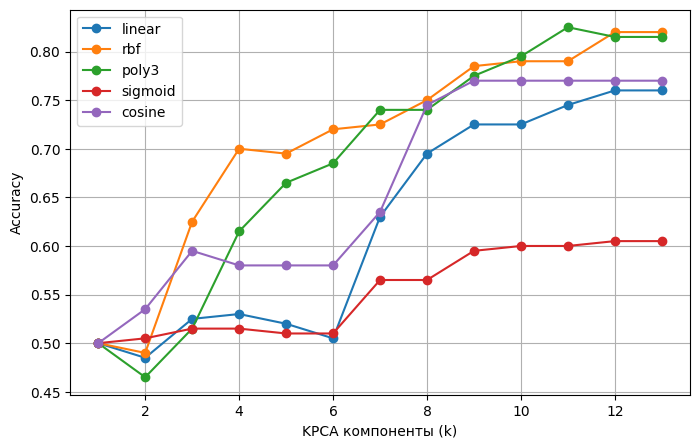

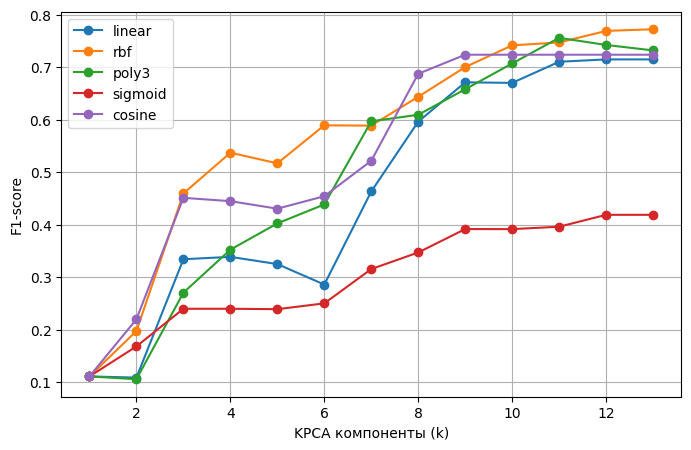

In [ ]:
plot_metric("acc", "Accuracy")
plot_metric("f1", "F1-score")
if len(np.unique(y_np))== 2:
    plot_metric("auc", "ROC-AUC")

Качество схожее, время быстрее через библиотеку, вероятно из-за оптимизированных методовв, которые там используются

## Задание 9 (3 балла)
#### PCA Image Compression

Метод главных компонент используют для понижения размерности данных. Давайте воспользуемся этим для компрессии изображения. Чтобы понять интуицию сжатия, обратимся к матричному разложению PCA

$$
\underbrace{X}_{w\times h} \approx \underbrace{T_l}_{w\times l} \cdot \underbrace{W_l^\top}_{l\times h},
$$
где $l < h$ (малоранговое приближение).

В папке с заданием вы найдёте 3-х канальное изображение `sean-yalda.jpg`. Вам необходимо получить сжатое информативное представление этого изображения.

Воспользуемся автоматическим скачиванием через shared-ссылку (вы можете напрямую добавить картинку в окружение ноутбука)

Downloading...
From: https://drive.google.com/uc?export=download&id=1geYxsmnvVJKQkyl-WB0izTqi-fLz8UET
To: /content/sean-yalda.jpg
100%|██████████| 2.11M/2.11M [00:00<00:00, 86.8MB/s]


(3375, 6000, 3)


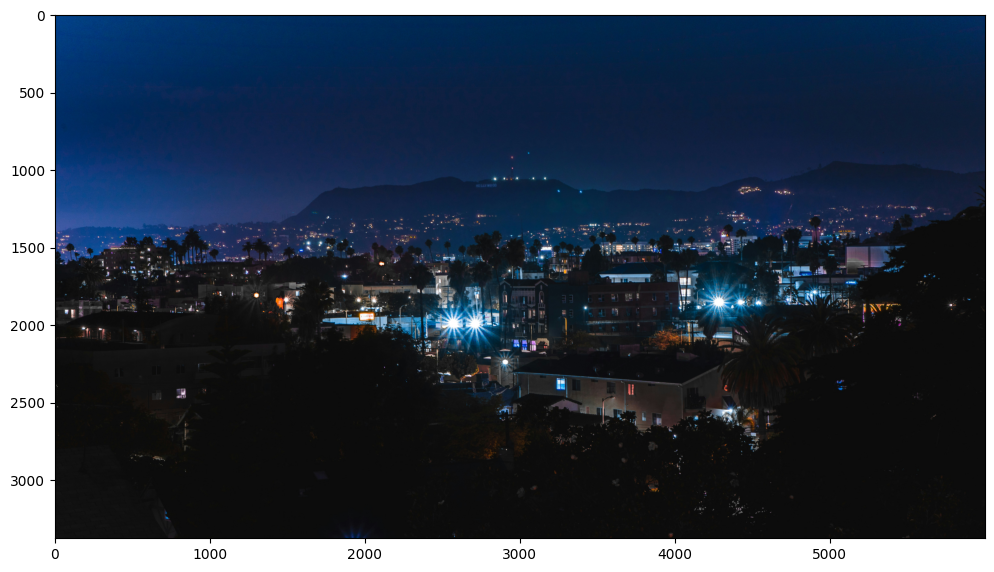

In [ ]:
image_file_id = "1geYxsmnvVJKQkyl-WB0izTqi-fLz8UET"
download_with_shared_id(image_file_id, 'sean-yalda.jpg')

# Load image
image = Image.open("sean-yalda.jpg")
image_array = np.array(image).astype(np.uint8)
print(image_array.shape)

plt.figure(figsize=[12,8])
plt.imshow(image)

Обратите внимание, что мы работаем с форматом `uint8`.

Сделаем пробное сжатие с помощью PCA.

Метод главных компонент работает с двумерными матрицами, поэтому 3-х канальное изображение необходимо преобразовать. Для примера, давайте просуммируем изображение вдоль всех каналов.

transformed data shape: (3375, 100)


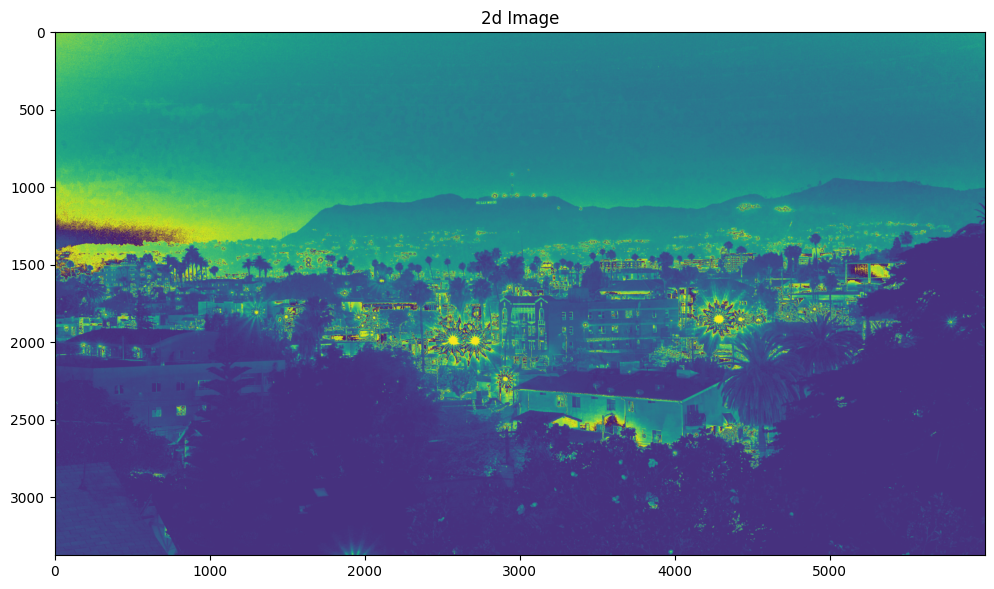

In [ ]:
from sklearn.decomposition import PCA

image_2d = image_array.sum(axis=2).astype(np.uint8)
plt.figure(figsize=[12,8])
plt.imshow(Image.fromarray(image_2d))
plt.title("2d Image")

pca = PCA(n_components=100)
transformed_data = pca.fit_transform(image_2d)
print(f"transformed data shape: {transformed_data.shape}")

Мы получили сжатое представление $T_l$. Для реконструкции $X$, необходимо обратно перевести $T_l \rightarrow \tilde{X}$

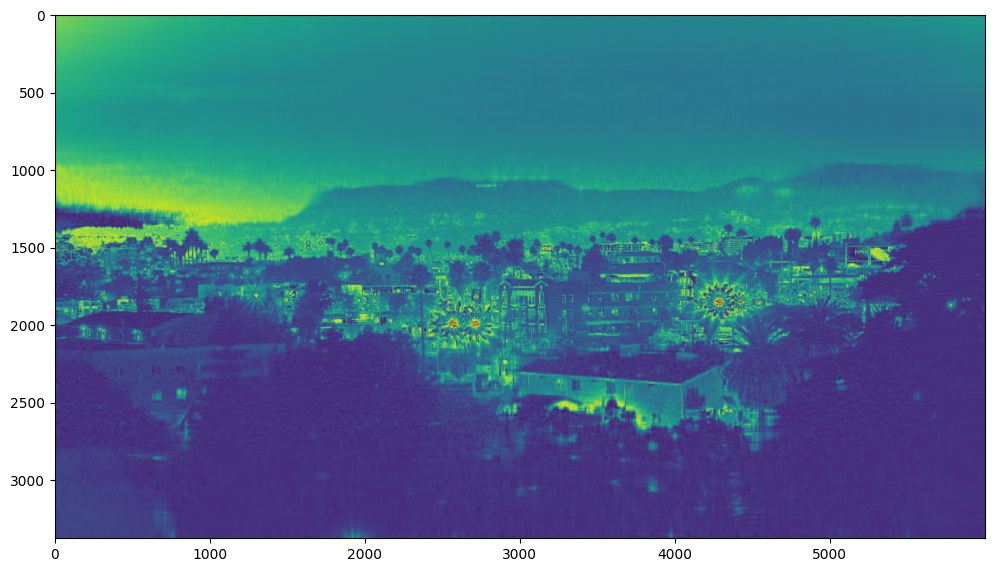

In [ ]:
reconstructed_image = np.dot(transformed_data, pca.components_) + pca.mean_
reconstructed_image = reconstructed_image.astype(np.uint8)
plt.figure(figsize=[12,8])
plt.imshow(Image.fromarray(reconstructed_image))

Степень сжатия будем определять как отношение размера оригинальной картинки к размеру всех ингридиентов для реконструкции:

In [ ]:
# Comparative analysis
original_size = image_array.nbytes / 1e+6
compressed_size = transformed_data.nbytes / 1e+6 + pca.components_.nbytes / 1e+6 + pca.mean_.nbytes / 1e+6

print(f"Original size: {original_size} Megabytes,\nPCA Compressed size: {compressed_size} Megabytes,\nRelative compression: {round(original_size / compressed_size, 3)} times")

Original size: 60.75 Megabytes,
PCA Compressed size: 7.548 Megabytes,
Relative compression: 8.048 times


Качество компрессии будем определять с помощью [`structural_similarity`](https://scikit-image.org/docs/0.24.x/auto_examples/transform/plot_ssim.html):
$$
\text{SSIM}(x, y) = \dfrac{(2\mu_x\mu_y + c_1)(2\Sigma_{xy} + c_2)}{(\mu_x^2 + \mu_y^2 + c_1)(\sigma_x^2 + \sigma_y^2 + c_2)} \in [-1, 1],
$$

где $\mu_x, \sigma_x, \mu_y, \sigma_y$ - средние и дисперсии изображений $x$ и $y$, $\Sigma_{xy}$ - ковариация. Константы $c_1$ и $c_2$ нужны для численной устойчивости.

Индекс $\text{SSIM}$ интерпретируется как структурная близость изображений. $\text{SSIM} = 1$ означает идеальную близость (изображения одинаковые). $\text{SSIM} = 0$ для случайных изображений, $\text{SSIM} = -1$ в случае идеальной анти-корреляции.

Обратите внимание, несмотря на преобразование исходного изображения к двумерному виду, финальное качество меряется в сравнении с оригиналом.

В связи с этим, реконструированное изображение необходимо привести к 3-х мерному виду. Для этого давайте просто скопируем его вдоль новой оси.

In [ ]:
from skimage.metrics import structural_similarity as ssim

image_3d = np.stack([image_2d, image_2d, image_2d], axis=-1).astype(np.uint8)
reconstructed_image_3d = np.stack([reconstructed_image, reconstructed_image, reconstructed_image], axis=-1).astype(np.uint8)

ssim_index = ssim(image_array, reconstructed_image_3d, win_size=5, channel_axis=-1)
ssim_index_2 = ssim(image_2d, reconstructed_image, win_size=5, channel_axis=-1)
ssim_index_3 = ssim(image_array, image_3d, win_size=5, channel_axis=-1)

print(f"Target SSIM: {ssim_index}")
print(f"SSIM between 2d images: {ssim_index_2}")
print(f"SSIM between Summed and Original Image: {ssim_index_3}")

Target SSIM: 0.4516087475956824
SSIM between 2d images: 0.7219054939663777
SSIM between Summed and Original Image: 0.48889587991530065


Можно заметить, что основная просадка обоснована упрощением, связанным с приведением оригинального изображения к двумерному виду посредством суммирования его по каналам. Также, количество главных компонент было выбрано произвольно.

### Задача 1 (2 балла)
#### Channel-wise Compression

Вам необходимо провести более аккуратную компрессию, сжимая изображение независимо по каждому из каналов и подбирая для каждого из них своё количество компонент.

**Вам необходимо достигнуть степени сжатия в 1.5 раза при ssim > 0.9**

In [ ]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
# Channel-wise PCA compression: подбираем k (одно и то же для всех каналов)
from sklearn.decomposition import PCA
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import matplotlib.pyplot as plt

H, W, C= image_array.shape
orig_bytes= image_array.nbytes

def pca_compress_channel(A2d, k):
    p= PCA(n_components=k, svd_solver="randomized", random_state=0)
    Z= p.fit_transform(A2d)
    A_rec= (Z@p.components_)+p.mean_
    size_bytes= Z.nbytes+p.components_.nbytes+p.mean_.nbytes
    return A_rec, size_bytes

target_ratio= 1.5
target_ssim= 0.90
ks_to_try= [5, 8, 12, 16, 20, 24]

best = None

In [ ]:
for k in ks_to_try:
    rec_channels= []
    total_comp_bytes= 0
    for ch in range(C):
        A= image_array[..., ch].astype(np.float64)
        A_rec, sz= pca_compress_channel(A, k)
        total_comp_bytes+= sz
        rec_channels.append(A_rec)

    rec= np.stack(rec_channels, axis=-1)
    rec_uint8= np.clip(np.rint(rec), 0, 255).astype(np.uint8)

    ssim_val= ssim(image_array, rec_uint8, channel_axis=-1)
    ratio= orig_bytes / total_comp_bytes

    if (best is None) or (ssim_val > best[1]) or (ssim_val >= best[1] and ratio > best[0]):
        best= (ratio, ssim_val, k, rec_uint8, total_comp_bytes)

    print(f"k={k:3d} | compression≈{ratio:5.2f}× | SSIM={ssim_val:.4f}")

    if ratio>= target_ratio and ssim_val >= target_ssim:
        break

ratio, ssim_val, k_star, rec_img, comp_bytes = best
print("\nSelected:")
print(f"k*={k_star}, compression≈{ratio:.2f}× (orig {orig_bytes/1e6:.2f} MB → comp {comp_bytes/1e6:.2f} MB), SSIM={ssim_val:.4f}")


k=  5 | compression≈47.87× | SSIM=0.8204
k=  8 | compression≈31.25× | SSIM=0.8256
k= 12 | compression≈21.36× | SSIM=0.8318
k= 16 | compression≈16.23× | SSIM=0.8375
k= 20 | compression≈13.08× | SSIM=0.8420
k= 24 | compression≈10.96× | SSIM=0.8462

Selected:
k*=24, compression≈10.96× (orig 60.75 MB → comp 5.54 MB), SSIM=0.8462


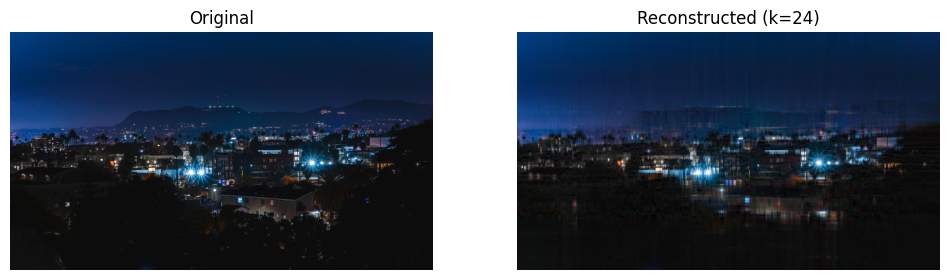

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(Image.fromarray(image_array))
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(Image.fromarray(rec_img))
plt.title(f"Reconstructed (k={k_star})")
plt.axis('off')
plt.show()